In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
## Paquete para mejorar la estética de matplolib
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
from numpy import *
import scipy as sp
from pandas import *
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
import pandas.rpy.common as com

In [4]:
ro.r('data(mtcars)')

'mtcars'


In [115]:
from scipy.stats import iqr
def low_variability(df,umbral):
    meds=[]
    iqs=[]
    for var in list(df):
        meds.append(np.percentile(df[var],50))
        iqs.append(iqr(df[var]))
        
        if np.var(df[var])<umbral*iqr(df[var]):
            df.drop(var, axis=1, inplace=True)
            
    plt.scatter(meds,iqs)
    plt.plot([0, 200], [np.mean(np.array(iqs)), np.median(np.array(iqs))], 'r-',label='media de IQR',linewidth=4,color='red')
    plt.xlabel("Medianas")
    plt.ylabel("IQR")
    plt.title('Medianas vs. Rangos IC') 
    plt.legend(loc="center")
    plt.show()
    print('corte IQR',np.median(np.array(iqs)))

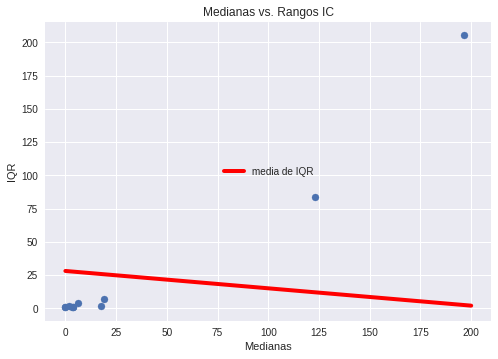

corte IQR 2.0


In [116]:
low_variability(cars,.25) 

In [121]:
cars = com.load_data('mtcars')

In [6]:
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


In [9]:
cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [40]:
np.var(cars.iloc[:,1])

3.08984375

In [30]:
from scipy.stats import iqr

b=iqr(cars['cyl'])
a=np.percentile(cars['cyl'],50)
a/b

1.5

In [62]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(.25)
selector.fit_transform(cars)

array([[  21.   ,    6.   ,  160.   ,  110.   ,    3.9  ,    2.62 ,
          16.46 ,    4.   ,    4.   ],
       [  21.   ,    6.   ,  160.   ,  110.   ,    3.9  ,    2.875,
          17.02 ,    4.   ,    4.   ],
       [  22.8  ,    4.   ,  108.   ,   93.   ,    3.85 ,    2.32 ,
          18.61 ,    4.   ,    1.   ],
       [  21.4  ,    6.   ,  258.   ,  110.   ,    3.08 ,    3.215,
          19.44 ,    3.   ,    1.   ],
       [  18.7  ,    8.   ,  360.   ,  175.   ,    3.15 ,    3.44 ,
          17.02 ,    3.   ,    2.   ],
       [  18.1  ,    6.   ,  225.   ,  105.   ,    2.76 ,    3.46 ,
          20.22 ,    3.   ,    1.   ],
       [  14.3  ,    8.   ,  360.   ,  245.   ,    3.21 ,    3.57 ,
          15.84 ,    3.   ,    4.   ],
       [  24.4  ,    4.   ,  146.7  ,   62.   ,    3.69 ,    3.19 ,
          20.   ,    4.   ,    2.   ],
       [  22.8  ,    4.   ,  140.8  ,   95.   ,    3.92 ,    3.15 ,
          22.9  ,    4.   ,    2.   ],
       [  19.2  ,    6.   ,  167.6  ,

In [65]:
cars

,mpg,cyl,disp,hp,drat,wt,qsec,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,4.0,4.0


In [27]:
selector.variances_

array([  3.51889746e+01,   3.08984375e+00,   1.48807748e+04,
         4.55396484e+03,   2.76947559e-01,   9.27460875e-01,
         3.09337969e+00,   2.46093750e-01,   2.41210938e-01,
         5.27343750e-01,   2.52734375e+00])

In [119]:
ccar=cars.corr()

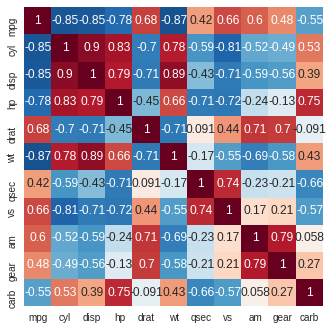

In [120]:
sns.heatmap(ccar, square = True, annot = True, cbar = False)

In [121]:
ccar

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [130]:
ccar[ccar['cyl']<1]['cyl'].max()

0.9020328721469989

In [134]:
ccar[ccar['cyl']==ccar[ccar['cyl']<1]['cyl'].max()].index[0]

'disp'

In [132]:
#Función que regresa la lista de variables a eliminar....
def correlation_filtering(df,target,umbral):
    elimina=[]#lista de campos a eliminar
    dfc=df.corr()
    crf=abs(dfc[dfc<1]).describe()
    sns.boxplot(x=crf.ix['max'],orient='v')
    plt.title('Distribución de correlaciones máximas por variable')
    
    for var in [x for x in list(df) if not (x==target)]:
        if abs(dfc[dfc[var]<1][var]).max()>umbral:
            
            corvar=dfc[abs(dfc[var])==abs(dfc[dfc[var]<1][var]).max()].index[0]
            print(var, corvar)
            #Cuál tiramos?... la que este menos correlacionada con el target
            if (abs(np.corrcoef(df[var],df[target])[0][1])<abs(np.corrcoef(df[corvar],df[target])[0][1])):
                el=var
                print('elimina',var)
            else:
                el=corvar
                print('elimina',corvar)
            
            if el not in elimina:
                elimina.append(el)
                
    return(elimina)        

cyl disp
elimina disp
disp cyl
elimina disp
wt disp
elimina disp


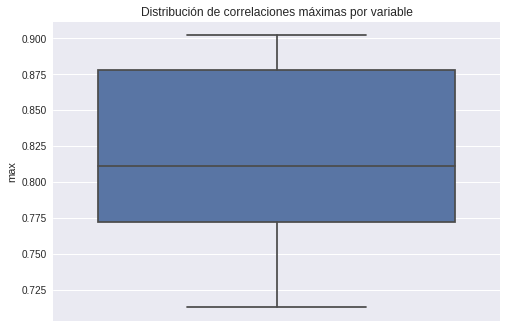

In [134]:
bye=correlation_filtering(cars,'mpg',0.875)

In [137]:
correlation_filtering(cars,'mpg')

cyl disp
disp cyl
hp cyl
drat am
wt disp
qsec vs
vs qsec
am gear
gear am
carb hp


In [143]:
ccar[ccar<1].describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,-0.105045,-0.092548,-0.087274,0.000680,-0.003717,-0.082868,-0.175225,-0.114563,0.005309,0.048412,0.056342
std,0.719852,0.749068,0.736459,0.684588,0.612368,0.696624,0.474858,0.618782,0.552153,0.516122,0.504683
min,-0.867659,-0.852162,-0.847551,-0.776168,-0.712441,-0.867659,-0.708223,-0.810812,-0.692495,-0.583287,-0.656249
25%,-0.829706,-0.672764,-0.680467,-0.643357,-0.637143,-0.665193,-0.551856,-0.675214,-0.452756,-0.422686,-0.435891
50%,-0.066121,-0.507647,-0.494634,-0.184454,0.000207,-0.364816,-0.221272,-0.193285,-0.086163,0.040160,0.165804
75%,0.569946,0.718619,0.691956,0.727046,0.620949,0.600962,0.024725,0.381715,0.491961,0.428732,0.419449
max,0.681172,0.902033,0.902033,0.832447,0.712711,0.887980,0.744535,0.744535,0.794059,0.794059,0.749812


In [151]:
crf=abs(ccar[ccar<1]).describe()
crf

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.673848,0.701341,0.682461,0.605711,0.528712,0.634234,0.426110,0.559207,0.461188,0.442398,0.429856
std,0.161009,0.155202,0.182568,0.247003,0.253799,0.214400,0.240544,0.223643,0.261873,0.226989,0.230055
min,0.418684,0.492687,0.394977,0.125704,0.090790,0.174716,0.091205,0.168345,0.057534,0.125704,0.057534
25%,0.563152,0.543052,0.564484,0.501256,0.442399,0.562009,0.216977,0.468938,0.233197,0.228030,0.304299
50%,0.672605,0.741217,0.710315,0.715660,0.690391,0.675622,0.426191,0.616823,0.556917,0.486486,0.477297
75%,0.829706,0.827039,0.833401,0.769579,0.707645,0.764982,0.639997,0.719927,0.669330,0.576358,0.564937
max,0.867659,0.902033,0.902033,0.832447,0.712711,0.887980,0.744535,0.810812,0.794059,0.794059,0.749812


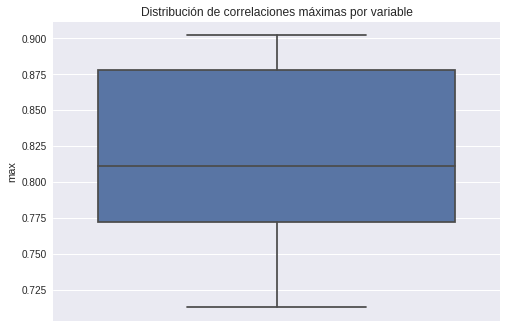

In [170]:
sns.boxplot(x=crf.ix['max'],orient='v')
plt.title('Distribución de correlaciones máximas por variable')

In [184]:
np.corrcoef(cars['cyl'],cars['mpg'])[0][1]

-0.85216195942661321

In [189]:
'mpg' not in list(cars)

False

In [199]:
cars[bye+['mpg']]

,disp,hp,am,qsec,gear,carb,mpg
Mazda RX4,160.0,110.0,1.0,16.46,4.0,4.0,21.0
Mazda RX4 Wag,160.0,110.0,1.0,17.02,4.0,4.0,21.0
Datsun 710,108.0,93.0,1.0,18.61,4.0,1.0,22.8
Hornet 4 Drive,258.0,110.0,0.0,19.44,3.0,1.0,21.4
Hornet Sportabout,360.0,175.0,0.0,17.02,3.0,2.0,18.7
Valiant,225.0,105.0,0.0,20.22,3.0,1.0,18.1
Duster 360,360.0,245.0,0.0,15.84,3.0,4.0,14.3
Merc 240D,146.7,62.0,0.0,20.00,4.0,2.0,24.4
Merc 230,140.8,95.0,0.0,22.90,4.0,2.0,22.8
Merc 280,167.6,123.0,0.0,18.30,4.0,4.0,19.2


In [334]:
cars = com.load_data('mtcars')

In [335]:
#Función para eliminar variables correlacionadas basado en que estas se relacionan con la variable target
def FCB_filtering(df,umbral,target):
    
    kp=[]
    features=[x for x in list(df) if not (x==target)]
    numf=1
    aux=df
    while(numf>0):#mientras tengamos una lista de variables correlacionadas econ el target...
        dfc=aux[features].corr()#hacemos la matriz de correlaciones de las variables distintas del target
    
        tabcor=pd.DataFrame(features,columns=[['variable']])
        tabcor['correlacion']=0#creamos un dataframe con una columna donde llenaremos la correlación de
        #de las variables vs. el target
        j=0
        for i in tabcor['variable']:
            tabcor['correlacion'].iloc[j]=np.corrcoef(aux[i], aux[target])[1][0]#correlación de variables y target
            j=j+1
        tabcor['abscor']=abs(tabcor['correlacion'])#creamos correlaciones en valor absoluto para ordenar
        #las variables más correlacionadas con el target positiva o negativamente
        tabcor.sort_values(by='correlacion',ascending=False) 
        ax = plt.axes()
        sns.barplot(y='variable',x='correlacion',data=tabcor.sort_values(by='correlacion',ascending=False))
        ax.set_title('Correlación variables con el target')
        plt.show()#graficamos las correlaciones vs. el target en cada paso
        sal=tabcor.sort_values(by='abscor',ascending=False)
        sal=sal[abs(sal['abscor'])>umbral]
        numf=len(sal)
        
        if numf>0:
            
            maxvar=sal['variable'].iloc[0]#tomamos la variable con mayor correlación
            kp.append(maxvar)
            ll=dfc[abs(dfc[maxvar])>umbral][maxvar].index
            #ll=ll[ll!=maxvar]
            print(' tira ',ll[ll!=maxvar])
            print(sal)
            aux=aux.drop(ll, axis=1, inplace=False)#borramos las variables más corelacionadas con nuestra
            #variable número1(la más correlacionada con el target)
            features=[x for x in list(aux) if not (x==target)]#quitamos las variables correlacionadas incluyendo
            #la variable de referencia para dar paso a la siguiente de la lista.

    return(kp+list(aux))

        

/home/abraham/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


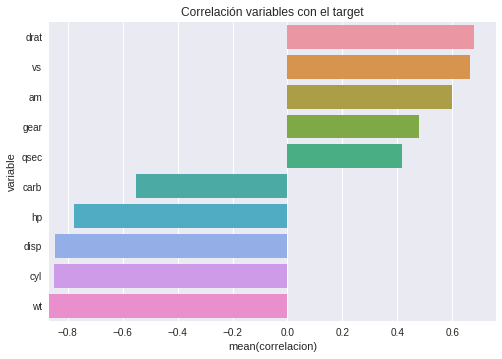

 tira  Index(['cyl', 'disp', 'drat'], dtype='object')
  variable  correlacion    abscor
4       wt    -0.867659  0.867659
0      cyl    -0.852162  0.852162
1     disp    -0.847551  0.847551
2       hp    -0.776168  0.776168


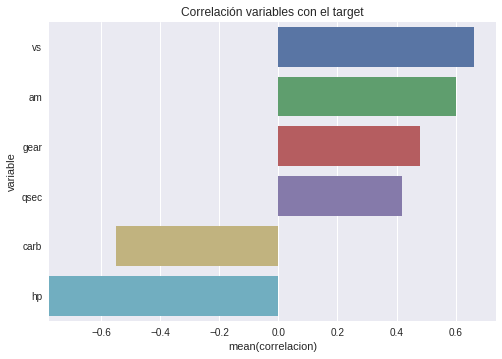

 tira  Index(['qsec', 'vs', 'carb'], dtype='object')
  variable  correlacion    abscor
0       hp    -0.776168  0.776168


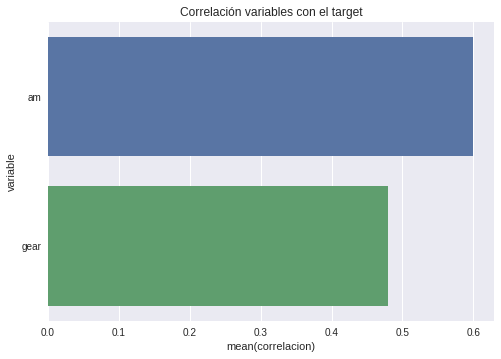

In [336]:
bye=FCB_filtering(cars,.7,'mpg')

In [337]:
cars[bye]

,wt,hp,mpg,am,gear
Mazda RX4,2.620,110.0,21.0,1.0,4.0
Mazda RX4 Wag,2.875,110.0,21.0,1.0,4.0
Datsun 710,2.320,93.0,22.8,1.0,4.0
Hornet 4 Drive,3.215,110.0,21.4,0.0,3.0
Hornet Sportabout,3.440,175.0,18.7,0.0,3.0
Valiant,3.460,105.0,18.1,0.0,3.0
Duster 360,3.570,245.0,14.3,0.0,3.0
Merc 240D,3.190,62.0,24.4,0.0,4.0
Merc 230,3.150,95.0,22.8,0.0,4.0
Merc 280,3.440,123.0,19.2,0.0,4.0


In [223]:
	cyl	-0.852162

Index(['cyl', 'disp'], dtype='object')

In [239]:
ccar.index[0]

'mpg'

In [234]:
cars.drop(['vs','hp'], axis=1, inplace=False)

,mpg,cyl,disp,drat,wt,qsec,am,gear,carb
Mazda RX4,21.0,6.0,160.0,3.90,2.620,16.46,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,3.90,2.875,17.02,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,3.85,2.320,18.61,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,3.08,3.215,19.44,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,3.15,3.440,17.02,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,2.76,3.460,20.22,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,3.21,3.570,15.84,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,3.69,3.190,20.00,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,3.92,3.150,22.90,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,3.92,3.440,18.30,0.0,4.0,4.0


In [235]:
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


In [325]:
we=cars
we=we.drop(['cyl'], axis=1, inplace=False)
we

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


In [112]:
cars = com.load_data('mtcars')

In [113]:
list(cars)
features=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
len(features)

10

In [114]:
import statsmodels.formula.api as smf
def importance_foreward(indata , yVar , xVar , stopn ):

    flist = []
    nx = min(len(xVar), stopn)
    rfinal=-np.inf

    for k in range(len(xVar)):
        
        best_score = -np.inf
        for i in xVar:
            newflist = flist + [i]
            f = yVar + ' ~ ' + '+'.join(newflist)
            reg = smf.ols(formula = str(f), data = indata).fit()
            score = reg.fvalue
            #print(newflist)
            #print('score es:',score)
            if score > best_score:
                best_r,best_score, record_i, record_newflist =np.round(reg.rsquared,2),score, i, newflist
        if best_r>rfinal:
            print(rfinal)
            rfinal=best_r 
            flist = record_newflist
            print (flist) 
            print(best_score)
            print(best_r)
            

            xVar.remove(record_i)
            print (len(xVar))
    finmodel =  smf.ols(formula = str(yVar + ' ~ ' + '+'.join(flist)), data = indata).fit()
    print (finmodel.summary())
    return flist

In [115]:
#importance_foreward(cars , 'mpg' , features ,10)

In [116]:
def forward_filtering(df,target,varbs):
    ll=[]#declaramos la lista que vamos a llenar con las variables finales a seleccionar
    rfinal=-np.inf#vamos a usar R2 como métrica de éxito del modelo y escogeremos la lista donde se maximice este
    #dato.
    for k in range(len(varbs)):#vamos a recorrer todas las variables y después elegiremos la lista de mejor R2
        score_max=-np.inf#inicializamos este score que será el estadístico F de cada combinación de variables.
        #cross validation vamos a recorrer cada variable con la escogida en el paso anterior.
        for var in varbs:
            newll=ll+[var]#.append(var)#agregamos la variable a la lista
            f = target + ' ~ ' + '+'.join(newll)#hacemos la expresion target~variables para llamar un regresion
            mod = smf.ols(formula = str(f), data = df).fit()#ajustamos la regresion con las variables en ll
            score = mod.fvalue#obtenemos el valor f de cada lista para escoger la mejor...
            if score>score_max:#si encontramos una seleccion que supere la mejor f la cambiamos
                rs,score_max, var_i, rnewll =np.round(mod.rsquared,2),score, var, newll
        
        if rs>rfinal:#si encontramos una lista de variables con mejor r2 la cambiamos
            print(rfinal)
            rfinal=rs
            ll=rnewll
            print(ll)
            print(score_max)
            print(rs)
            varbs.remove(var_i)
            
    modelo_fin=smf.ols(formula = str(target + ' ~ ' + '+'.join(ll)), data = df).fit() #modelo final y variabes
    print (modelo_fin.summary())
    return(ll)#regresa lista de variables a escoger..

In [117]:
forward_filtering(cars,'mpg',features)

-inf
['wt']
91.3753250038
0.75
0.75
['wt', 'cyl']
70.908360538
0.83
0.83
['wt', 'cyl', 'hp']
50.1714950873
0.84
0.84
['wt', 'cyl', 'hp', 'am']
37.9612838698
0.85
0.85
['wt', 'cyl', 'hp', 'am', 'qsec']
31.4383284928
0.86
0.86
['wt', 'cyl', 'hp', 'am', 'qsec', 'disp']
26.9071043425
0.87
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     26.91
Date:                vie, 17 nov 2017   Prob (F-statistic):           9.29e-10
Time:                        21:16:49   Log-Likelihood:                -70.230
No. Observations:                  32   AIC:                             154.5
Df Residuals:                      25   BIC:                             164.7
Df Model:                           6                                         
Cov

['wt', 'cyl', 'hp', 'am', 'qsec', 'disp']

In [118]:
cars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6.0,160.0,110.0,3.90,2.620,16.46,0.0,1.0,4.0,4.0
Mazda RX4 Wag,21.0,6.0,160.0,110.0,3.90,2.875,17.02,0.0,1.0,4.0,4.0
Datsun 710,22.8,4.0,108.0,93.0,3.85,2.320,18.61,1.0,1.0,4.0,1.0
Hornet 4 Drive,21.4,6.0,258.0,110.0,3.08,3.215,19.44,1.0,0.0,3.0,1.0
Hornet Sportabout,18.7,8.0,360.0,175.0,3.15,3.440,17.02,0.0,0.0,3.0,2.0
Valiant,18.1,6.0,225.0,105.0,2.76,3.460,20.22,1.0,0.0,3.0,1.0
Duster 360,14.3,8.0,360.0,245.0,3.21,3.570,15.84,0.0,0.0,3.0,4.0
Merc 240D,24.4,4.0,146.7,62.0,3.69,3.190,20.00,1.0,0.0,4.0,2.0
Merc 230,22.8,4.0,140.8,95.0,3.92,3.150,22.90,1.0,0.0,4.0,2.0
Merc 280,19.2,6.0,167.6,123.0,3.92,3.440,18.30,1.0,0.0,4.0,4.0


In [91]:
.87>.87

False